<a href="https://colab.research.google.com/github/tdavila28/cauca_piloto/blob/main/preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lectura y preprocesamiento de archivos Cauca


#Entorno

In [ ]:
dir_raiz = '/content/drive/MyDrive/Cauca_all/'

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

#Librerias e instalación de herramientas

In [ ]:
!pip install geopandas


In [ ]:
!pip install rasterio

In [ ]:
!pip install richdem

In [ ]:
import osgeo
import geopandas as gp
import numpy as np
from osgeo import gdal
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# explorar archivos
import glob
import os

1. Importar capas_ exploratorias

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

In [ ]:
#Abrir los tif
import xarray as xr

#Importar Capas shape - manera tradicional#


In [ ]:
cauca_area=gp.read_file("/content/drive/MyDrive/Cauca_all/limite_cauca.shp")
paramos=gp.read_file("/content/drive/MyDrive/Cauca_all/paramos.shp")
humedales=gp.read_file("/content/drive/MyDrive/Cauca_all/humedales.shp")

In [ ]:
Ramsar=gp.read_file("/content/drive/MyDrive/Cauca_all/RAMSAR.shp")
Amb_RUNAP=gp.read_file("/content/drive/MyDrive/Cauca_all/Runap.shp")
Amb_ley2=gp.read_file("/content/drive/MyDrive/Cauca_all/ley2da.shp")


In [ ]:
#Via=gp.read_file("/content/drive/MyDrive/Cauca_all/vias.shp")
#Drenaje_sencillo=gp.read_file("/content/drive/MyDrive/Cauca_all/drenaje_sencillo.shp")
#Drenaje_doble=gp.read_file("/content/drive/MyDrive/Cauca_all/drenaje_doble.shp")

In [ ]:
#Cobertura_2018=gp.read_file("/content/drive/MyDrive/Cauca_all/Cobertura_Tierra_2018.shp")
#Cobertura_2010_2012=gp.read_file("/content/drive/MyDrive/Cauca_all/cob_2010_2012.shp")
#Cobertura_2005_2009=gp.read_file("/content/drive/MyDrive/Cauca_all/cob_2005_2009.shp")
#Cobertura_2000_2002=gp.read_file("/content/drive/MyDrive/Cauca_all/cob_2000_2002.shp")

In [ ]:
#Zona_Reserva_Campesina=gp.read_file("/content/drive/MyDrive/Cauca_all/zona_reserva_campesina_Argelia.shp")
Comunidades_negras=gp.read_file("/content/drive/MyDrive/Cauca_all/comunid_negras.shp")
Resguardo_Indigena_=gp.read_file("/content/drive/MyDrive/Cauca_all/resguardos.shp")
#centro_poblado_mascabeceras=gp.read_file("/content/drive/MyDrive/Cauca_all/cent_pob_cabeceras.shp")
#suelos=gp.read_file("/content/drive/MyDrive/Cauca_all/Suelos_Cauca.shp")

In [ ]:
#buffer25m=gp.read_file("/content/drive/MyDrive/Cauca_all/Argelia_buffer_25m.shp")

#merge ambiental# (no correr mientras rasterizo)

In [ ]:
ambiental=gp.GeoDataFrame(pd.concat([paramos,Ramsar,Amb_RUNAP,Amb_ley2,humedales]))

In [ ]:
ambiental.columns

Index(['OBJECTID', 'Id', 'Nombre', 'Escala', 'Acto_Admin', 'Fecha_Acto',
       'No_Poligon', 'Fuente', 'Area_Ha', 'Fecha_Ingr', 'Fecha_Reco',
       'Shape_Leng', 'Shape_Le_1', 'Shape_Le_2', 'Shape_Area', 'geometry',
       'OBJECTID_1', 'CAPA', 'NOMBRE', 'ACTO_ADMIN', 'ESTADO_PRO', 'ESCALA',
       'nombre', 'id_pnn', 'categoria', 'territoria', 'resolucion',
       'hectareas_', 'escala', 'organizaci', 'fecha_act', 'url', 'centroid_x',
       'centroid_y', 'fecha_regi', 'Areas_Prot', 'id', 'nom_ley2', 'area_ha',
       'res_zoni', 'fecha_ingr', 'fecha_reco', 'st_area_sh', 'st_perimet',
       'Nivel_Hume', 'NOMAH', 'NOMZH', 'NOMSZH', 'Grado_Tran'],
      dtype='object')

<Axes: >

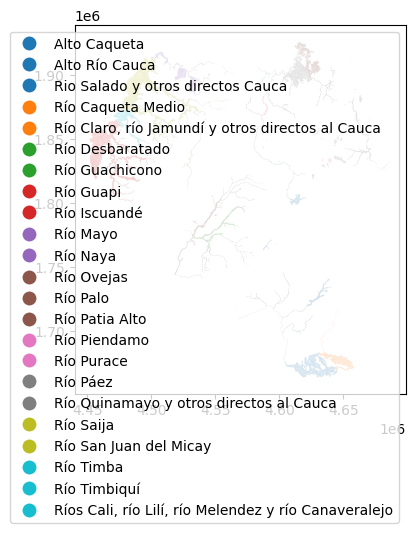

In [ ]:
ambiental.plot('NOMSZH',legend=True)

In [ ]:
ambiental.crs

<Projected CRS: EPSG:9377>
Name: MAGNA-SIRGAS 2018 / Origen-Nacional
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Coordinate Operation:
- name: Colombia Transverse Mercator
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia 2018
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
ambiental_final=ambiental.dissolve(by='OBJECTID')

In [ ]:
ambiental_final.head()

,geometry,Id,Nombre,Escala,Acto_Admin,Fecha_Acto,No_Poligon,Fuente,Area_Ha,Fecha_Ingr,...,res_zoni,fecha_ingr,fecha_reco,st_area_sh,st_perimet,Nivel_Hume,NOMAH,NOMZH,NOMSZH,Grado_Tran
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,"MULTIPOLYGON (((4645747.050 1719432.447, 46457...",PD_034,Cerro Plateado,100.000,Resolución No. 1503 de 6 de Agosto de 2018,2018-08-06,0.0,Minambiente,943.487640,2020-07-22,...,Resolucion 1925 De 2013 Zonificacion,2022-06-10,2022-05-09,28.252840,103.728395,2.0,Magdalena Cauca,Cauca,Río Purace,Natural
2,"MULTIPOLYGON (((4471867.889 1794978.955, 44719...",PD_034,Cerro Plateado,100.000,Resolución No. 1503 de 6 de Agosto de 2018,2018-08-06,0.0,Minambiente,16126.849888,2020-07-22,...,Resolucion 1926 De 2013 Zonificacion,2022-12-01,2022-12-01,6.523680,70.336074,2.0,Magdalena Cauca,Cauca,Río Purace,Transformado
3,"MULTIPOLYGON (((4564599.629 1706849.446, 45645...",PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,7282.962817,2020-07-22,...,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,2.0,Magdalena Cauca,Cauca,Río Purace,Transformado
4,"MULTIPOLYGON (((4590368.290 1849000.399, 45903...",PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,199.025648,2020-07-22,...,None,None,None,NaN,NaN,2.0,Magdalena Cauca,Cauca,Río Purace,Transformado
5,"MULTIPOLYGON (((4580149.647 1775143.304, 45801...",PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,519.213181,2020-07-22,...,None,None,None,NaN,NaN,2.0,Magdalena Cauca,Cauca,Río Purace,Transformado


<Axes: >

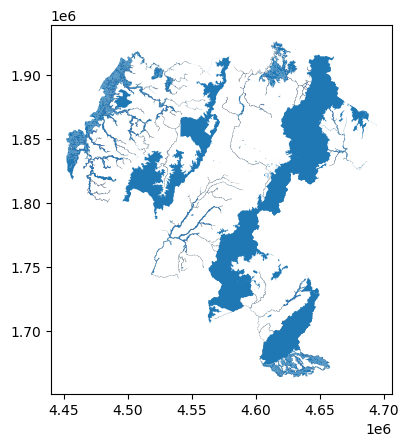

In [ ]:
ambiental_final.plot()

In [ ]:
ambiental_final.to_file("/content/drive/MyDrive/Cauca_all/ambiental_final.shp")

**merge social** 

In [ ]:
social=gp.GeoDataFrame(pd.concat([Comunidades_negras,Resguardo_Indigena_]))

In [ ]:
social_final=social.dissolve(by='OBJECTID')

In [ ]:
social_final.head()

,geometry,NOMBRE_COM,RESOLUCION,AREA_TITUL,ANO,NUMERO_PLA,DEPARTAMEN,MUNICIPIO,CEDULA_CAT,MATRICULA_,...,ID_RESGUAR,NOMBRE_RES,TIPO_PROCE,TIPO_ACTO_,NUMERO_ACT,FECHA_ACTO,AREA_ACTO_,OBS_RES,OBS_PLANO,PUEBLO
OBJECTID,,,,,,,,,,,,,,,,,,,,,
16,MULTIPOLYGON Z (((4685600.168 1835537.417 0.00...,La Cuenca Del Río San Bernardo Patía Norte,Resolución 2064 del 18-nov-2002,"25652,3907",2002,P - 638.987 / P - 1912.018 / 1912.017 / P 638....,19,19809,None,126-4647,...,10209,Pickwetha Fiw,LEGALIZACIÓN DECRETO 1071,RESOLUCIÓN,0012,2003-07-22,523.9612,R1: - R2:12-37824 - R3: - R4: - R5: - R6: ...,P1:P-638973 - P2: - P3: - P4: - P5:,Paez
24,MULTIPOLYGON Z (((4622811.823 1673935.100 0.00...,None,None,None,None,ACCTI 195331312,CAUCA,19533,None,None,...,10856,Resguardo Indígena Rumiñawi,LEGALIZACIÓN DECRETO 1071,ACUERDO,233,2022-06-30,1222.2907,El acuerdo no presenta observaciones,El plano no presenta observaciones,Inga
27,MULTIPOLYGON Z (((4496436.377 1874625.149 0.00...,Parte Baja Del Río Saija,Resolución 2245 del 4-dic-2002,"16115,9229",2002,None,19,TIMBIQUÍ,None,126-4645,...,None,None,None,None,None,None,NaN,None,None,None
28,MULTIPOLYGON Z (((4481055.009 1871289.084 0.00...,Negros En Acción,Resolución 2203 del 3-dic-2002,"14362,8095",2002,10-0-00046,19,TIMBIQUÍ,None,126-4641,...,10211,Playita San Francisco,LEGALIZACIÓN DECRETO 1071,ACUERDO,0178,2009-09-03,3149.2604,R1: - R2:178-40059 - R3: - R4: - R5: - R6:...,P1: - P2: - P3: - P4: - P5:,Eperara Siapidara
29,"POLYGON Z ((4535232.249 1872586.539 0.000, 453...",San Joc Parte Alta Del Río Micay,Resolución 1646 del 6-oct-2004,"14560,6790",2004,None,19,19418,None,None,...,None,None,None,None,None,None,NaN,None,None,None


<Axes: >

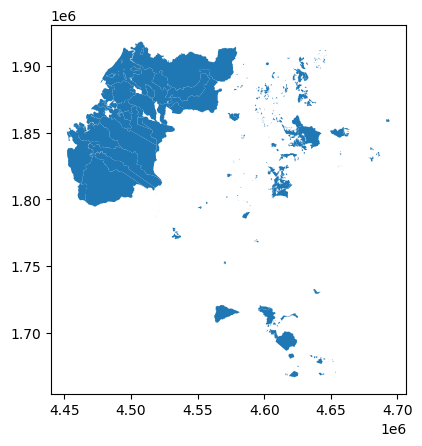

In [ ]:
social_final.plot()

In [ ]:
social_final.to_file("/content/drive/MyDrive/Cauca_all/social_merge.shp")

#Lectura y Conversion - Rasterización con GDAL #

      1. Lectura y visualización de raster 

Visualización del DEM 

In [ ]:
dem = gdal.Open("/content/drive/MyDrive/Cauca_all/dem_cauca.tif")

In [ ]:
proj=dem.GetProjection()
print(proj)

PROJCS["MAGNA-SIRGAS_Origen-Nacional",GEOGCS["GCS_MAGNA",DATUM["MAGNA",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",4],PARAMETER["central_meridian",-73],PARAMETER["scale_factor",0.9992],PARAMETER["false_easting",5000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [ ]:
band=dem.GetRasterBand(1)
array=band.ReadAsArray()

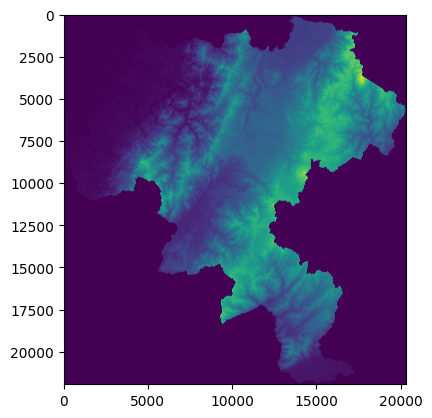

In [ ]:
plt.figure()
plt.imshow(array)
plt.show()

    Conversión de Shapes a Raster 
https://gis.stackexchange.com/questions/212795/rasterizing-shapefiles-with-gdal-and-python

https://stackoverflow.com/questions/59821554/converting-vector-shp-to-raster-tiff-using-python-gdal-library


In [ ]:
from osgeo import gdal, ogr,osr

In [ ]:
#from osgeo import gdal, ogr,osr

# Define pixel_size and NoData value of new raster
#pixel_size = 12
NoData_value =-9999

# Filename of input OGR file
train_fn = r'/content/drive/MyDrive/Cauca_all/paramos.shp'
train_ds=ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/drive/MyDrive/Cauca_all/test.tif'

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)

#tipo formato, proyección y extensión del raster
lyr=train_ds.GetLayer()
driver=gdal.GetDriverByName('GTiff')
target_ds=driver.Create(raster_fn,naip_ds.RasterXSize,naip_ds.RasterYSize,1,gdal.GDT_UInt16)
target_ds.SetGeoTransform(naip_ds.GetGeoTransform())
target_ds.SetProjection(naip_ds.GetProjection())
options=['ATTRIBUTE=OBJECTID']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds,[1],lyr,options=options)

#Write data to band 1
band = target_ds.GetRasterBand(1)
band.SetNoDataValue(0)

#para verificar valores antes de exportar archivo
#data=target_ds.GetRasterBand(1).ReadAsArray()
#print('min',data.min(),'max',data.max(),'mean',data.mean())

0

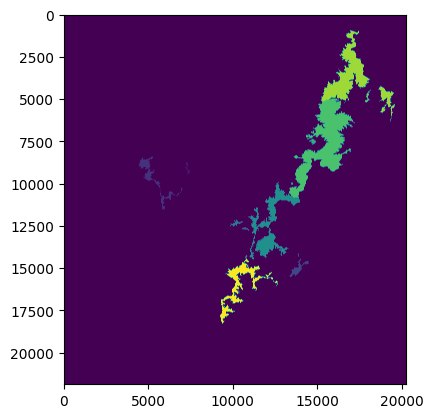

In [ ]:
plt.figure()
plt.imshow(data)

RASTERIZACIÓN CON EL MERGE AMBIENTAL 

In [ ]:
from osgeo import gdal, ogr,osr

# Define pixel_size and NoData value of new raster
#pixel_size = 12
NoData_value =-9999

# Filename of input OGR file
train_fn = r'/content/drive/MyDrive/Cauca_all/ambiental_final.shp'
train_ds=ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/drive/MyDrive/Cauca_all/test_ambiental.tif'

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)

#tipo formato, proyección y extensión del raster
lyr=train_ds.GetLayer()
driver=gdal.GetDriverByName('GTiff')
target_ds=driver.Create(raster_fn,naip_ds.RasterXSize,naip_ds.RasterYSize,1,gdal.GDT_UInt16)
target_ds.SetGeoTransform(naip_ds.GetGeoTransform())
target_ds.SetProjection(naip_ds.GetProjection())
options=['ATTRIBUTE=OBJECTID']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds,[1],lyr,options=options)

#Write data to band 1
#band = target_ds.GetRasterBand(1)
#band.SetNoDataValue(0)

#para verificar valores antes de exportar archivo
data=target_ds.GetRasterBand(1).ReadAsArray()
print('min',data.min(),'max',data.max(),'mean',data.mean())

min 0 max 12982 mean 280.03463811828874


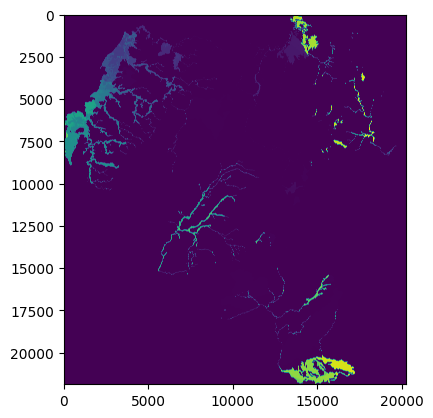

In [ ]:
plt.figure()
plt.imshow(data)

In [ ]:
data.shape

(21871, 20239)

RASTERIZACIÓN CON EL MERGE SOCIAL 

In [ ]:
#from osgeo import gdal, ogr,osr

# Define pixel_size and NoData value of new raster
#pixel_size = 12
NoData_value =-9999

# Filename of input OGR file
train_fn = r'/content/drive/MyDrive/Cauca_all/social_merge.shp'
train_ds=ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/drive/MyDrive/Cauca_all/social_merge.tif'

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)

#tipo formato, proyección y extensión del raster
lyr=train_ds.GetLayer()
driver=gdal.GetDriverByName('GTiff')
target_ds=driver.Create(raster_fn,naip_ds.RasterXSize,naip_ds.RasterYSize,1,gdal.GDT_UInt16)
target_ds.SetGeoTransform(naip_ds.GetGeoTransform())
target_ds.SetProjection(naip_ds.GetProjection())
options=['ATTRIBUTE=OBJECTID']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds,[1],lyr,options=options)

#Write data to band 1
#band = target_ds.GetRasterBand(1)
#band.SetNoDataValue(0)

#para verificar valores antes de exportar archivo
data=target_ds.GetRasterBand(1).ReadAsArray()
print('min',data.min(),'max',data.max(),'mean',data.mean())

min 0 max 826 mean 31.26776633242175


In [ ]:
data.shape

(21871, 20239)

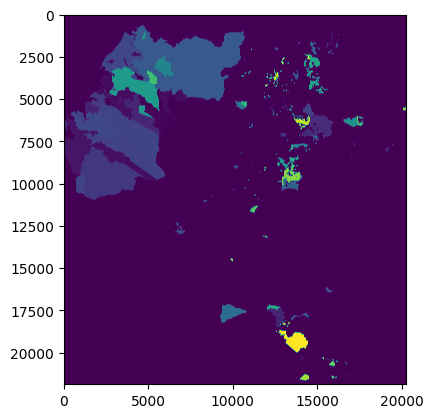

In [ ]:
plt.figure()
plt.imshow(data)

In [ ]:
data.shape

(21871, 20239)

#Exploración y conversión COBERTURAS#

In [ ]:
Cobertura_2018.head()

,codigo,leyenda,insumo,apoyo,confiabili,cambio,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,Shape_Leng,Shape_Area,ruleid,geometry
0,321113,321113,Landsat_2018_median_06052019_v9,NaN,SI,2,3,32,321,3211,32111,321113,0.514796,0.001057,35,"POLYGON ((4545419.569 1770895.832, 4545455.217..."
1,3232,3232,Landsat_2018_median_06052019_v9,NaN,SI,2,3,32,323,3232,NaN,NaN,0.079908,0.000141,37,"POLYGON ((4561869.842 1780368.611, 4561880.762..."
2,3232,3232,Landsat_2018_median_06052019_v9,NaN,SI,1,3,32,323,3232,NaN,NaN,0.092174,0.000129,37,"POLYGON ((4579472.811 1779579.915, 4579509.973..."
3,242,242,Landsat_2018_median_06052019_v9,NaN,SI,2,2,24,242,NaN,NaN,NaN,0.119406,0.000130,26,"POLYGON ((4570332.277 1768846.468, 4570325.624..."
4,242,242,Landsat_2018_median_06052019_v9,NaN,SI,2,2,24,242,NaN,NaN,NaN,0.209496,0.000363,26,"POLYGON ((4565712.818 1750793.537, 4565694.168..."


In [ ]:
Cobertura_2018.shape

(11155, 16)

In [ ]:
Cobertura_2018.describe()

,codigo,Shape_Leng,Shape_Area,ruleid
count,11155.000000,11155.000000,11155.000000,11155.000000
mean,15469.859794,0.167995,0.000426,28.590856
std,64098.170651,2.120138,0.011907,7.249063
min,111.000000,0.008249,0.000004,1.000000
25%,242.000000,0.043954,0.000036,26.000000
50%,244.000000,0.066887,0.000064,28.000000
75%,3222.000000,0.116724,0.000132,35.000000
max,321122.000000,152.607401,0.735840,52.000000


In [ ]:
Cobertura_2018.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11155 entries, 0 to 11154
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   codigo      11155 non-null  int64   
 1   leyenda     11155 non-null  object  
 2   insumo      11155 non-null  object  
 3   apoyo       1465 non-null   object  
 4   confiabili  11155 non-null  object  
 5   cambio      11155 non-null  object  
 6   nivel_1     11155 non-null  object  
 7   nivel_2     11155 non-null  object  
 8   nivel_3     11155 non-null  object  
 9   nivel_4     4092 non-null   object  
 10  nivel_5     818 non-null    object  
 11  nivel_6     467 non-null    object  
 12  Shape_Leng  11155 non-null  float64 
 13  Shape_Area  11155 non-null  float64 
 14  ruleid      11155 non-null  int64   
 15  geometry    11155 non-null  geometry
dtypes: float64(2), geometry(1), int64(2), object(11)
memory usage: 1.4+ MB


In [ ]:
paramos.isna().sum()

Id            0
Nombre        0
Escala        0
Acto_Admin    0
Fecha_Acto    0
No_Poligon    0
Fuente        0
Area_Ha       0
Fecha_Ingr    0
Fecha_Reco    0
Shape_Leng    0
Shape_Le_1    0
Shape_Area    0
geometry      0
dtype: int64

##Clip de todas las capas de acuerdo al buffer del municipio##

#Calculo Slope with DEM#

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 0.0, 'width': 20299, 'height': 21938, 'count': 1, 'crs': CRS.from_wkt('PROJCS["MAGNA-SIRGAS / Origen-Nacional",GEOGCS["MAGNA-SIRGAS",DATUM["MAGNA",SPHEROID["GRS 1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",4],PARAMETER["central_meridian",-73],PARAMETER["scale_factor",0.9992],PARAMETER["false_easting",5000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(12.0, 0.0, 4451184.442140709,
       0.0, -12.0, 1927255.3746435302)}
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 0.0, 'width': 20299, 'height': 21938, 'count': 1, 'crs': CRS.from_wkt('PROJCS["MAGNA-SIRGAS / Origen-Nacional",GEOGCS["MAGNA-SIRGAS",DATUM["MAGNA",SPHEROID["GRS 1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,

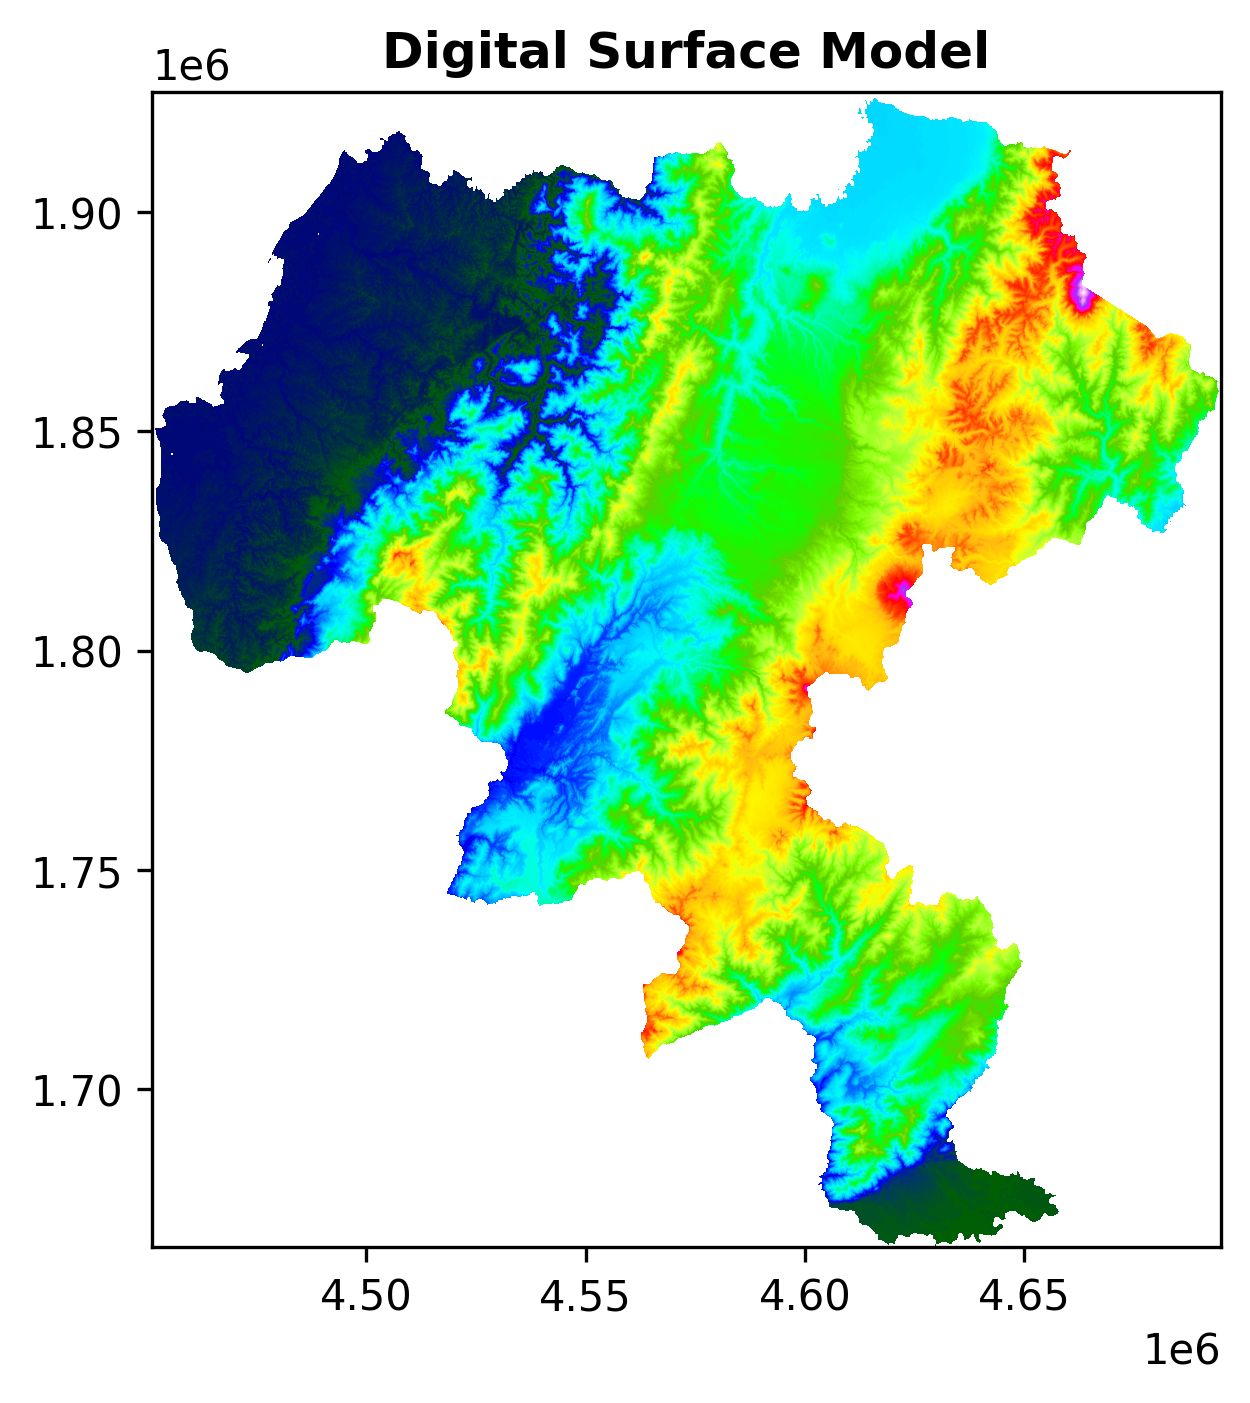

<Axes: title={'center': 'Digital Surface Model'}>

In [ ]:
# Open the two rasters 
dem = rasterio.open("/content/drive/MyDrive/Cauca_all/dem_cauca.tif", driver="GTiff")

# Metadata functions from Rasterio
print(dem.meta)
print(dem.meta)

# Plot with rasterio.plot, which provides Matplotlib functionality
plt.figure(figsize=(5, 5), dpi=300)  # adjust size and resolution
show(dem, title='Digital Surface Model', cmap='gist_ncar')


#POR ORGANIZAR# (SLOPE Y CLIPS)

In [ ]:
from geopandas import GeoSeries

In [ ]:
import folium

In [ ]:
distance=25

In [ ]:
Cobertura_2018.buffer(0.2)

In [ ]:
Cobertura_2018_argelia=gp.clip(Cobertura_2018,buffer25m)
Cobertura_2018_argelia.shape

In [ ]:
Cobertura_2018_argelia.columns

In [ ]:
#paramos_argelia.set_crs(epsg=9377,inplace=True)

Plots

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Cobertura_2018_argelia.columns

In [ ]:
fig,ax=plt.subplots(1,1)
Cobertura_2018_argelia.plot(column='codigo',ax=ax,legend=True, cmap='OrRd',facecolor="none", edgecolor="black");

Plotting multiple layers

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
paramos.plot(ax=ax,cmap='hsv')
Amb_humedal.plot(ax=ax,cmap='Accent',label='humedal')
Amb_RAMSAR.plot(ax=ax,cmap='black')
Amb_RUNAP.plot(ax=ax,cmap='Greens')
Amb_reservas_ley2.plot(ax=ax,cmap='Dark2')

Exportar a maquina el corte de todos los shapes por municipio 

In [ ]:
#paramos_argelia.to_file('C:\Users\tdavi\OneDrive\Documents\proyecto_Automata_Cauca\Insumos_shape_cortes_Cauca\vectores_zonas_estudio_origen_nacional\Argelia\paramos_argelia.shp')

In [ ]:
from osgeo import gdal,ogr,osr

In [ ]:
Argelia_Mask=gdal.Open("/content/drive/MyDrive/Argelia/Argelia_mask.geotiff")

In [ ]:
print(Argelia_Mask)

In [ ]:
slope = rd.TerrainAttribute(dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

#Calculo de distancias (Euclidiana/Geodesic)